In [27]:
import os
import sys
sys.path.insert(0, '..') # incluir modulos de la parent folder
import metnum
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import normalize

## Tiempos KNN

In [28]:
knn_data_files = os.listdir('knn_results')

def load_files(filenames):
    for filename in filenames:
        yield pd.read_csv(f"knn_results/{filename}")

knn_data = pd.concat(load_files(knn_data_files), ignore_index=True)
knn_data = knn_data.drop(knn_data[knn_data.knn != 3].index)

knn_data.describe()

/home/schlotty/Documents/mn/metodos-num/tp2/tp2/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


,accuracy,cohen_kappa,f1,kfold,knn,precision,predict_time,recall,train_size
count,60.000000,60.000000,60.000000,60.0,60.0,60.000000,60.000000,60.000000,60.000000
mean,0.957102,0.952282,0.957080,10.0,3.0,0.957885,18.760011,0.957102,20600.000000
std,0.011228,0.012510,0.011233,0.0,0.0,0.010702,16.038933,0.011228,9766.771755
min,0.920000,0.911024,0.919995,10.0,3.0,0.921749,1.230377,0.920000,6000.000000
25%,0.953125,0.947853,0.953118,10.0,3.0,0.954363,4.974576,0.953125,12000.000000
50%,0.960417,0.955994,0.960398,10.0,3.0,0.961049,15.618875,0.960417,21000.000000
75%,0.964286,0.960289,0.964225,10.0,3.0,0.964615,31.263907,0.964286,30000.000000
max,0.970833,0.967579,0.970814,10.0,3.0,0.970956,83.790033,0.970833,33600.000000


In [29]:
knn_grouped = knn_data.groupby(['train_size']).mean()
knn_grouped = knn_grouped.drop(['knn', 'kfold', 'accuracy', 'cohen_kappa', 'f1', 'precision', 'recall'], axis=1)

knn_grouped

,predict_time
train_size,
6000,1.240851
12000,4.984751
18000,11.219525
24000,20.002025
30000,31.288368
33600,43.824544


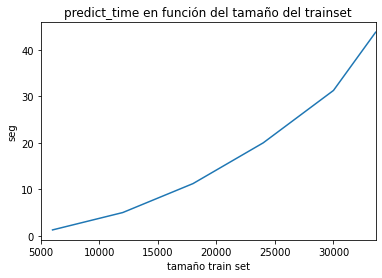

In [30]:

def plot_time(grouped, time, xd=1):
    xs = grouped.index.values
    
    plt.title(f"{time} en función del tamaño del trainset")
    plt.xlabel("tamaño train set")
    plt.ylabel("seg")
    
    ys = []
    for x in xs:
        ys.append(grouped.loc[x][time])
    plt.plot(xs, ys)

    plt.xlim(xd, xs[-1])
    plt.show()


plot_time(knn_grouped, 'predict_time', 5000)

## Tiempos KNN+PCA

In [15]:
knn_pca_data_files = os.listdir('knn_pca_times_results')

def load_files(filenames):
    for filename in filenames:
        yield pd.read_csv(f"knn_pca_times_results/{filename}")

knn_pca_data = pd.concat(load_files(knn_pca_data_files), ignore_index=True)
knn_pca_data = knn_pca_data.drop(knn_pca_data[(knn_pca_data.knn != 3) | (knn_pca_data.alpha != 35)].index)

knn_pca_data.describe()

,train_size,knn,alpha,kfold,accuracy,recall,f1,cohen_kappa,precision,pca_time,pred_time
count,60.000000,60.0,60.0,60.0,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,20600.000000,3.0,35.0,10.0,0.965410,0.965410,0.965437,0.961526,0.965864,4.620293,2.002994
std,9766.771755,0.0,0.0,0.0,0.009149,0.009149,0.009137,0.010191,0.008823,0.766816,1.577306
min,6000.000000,3.0,35.0,10.0,0.935000,0.935000,0.935414,0.927700,0.937092,3.124072,0.135113
25%,12000.000000,3.0,35.0,10.0,0.962083,0.962083,0.962123,0.957826,0.962660,4.109662,0.533505
50%,21000.000000,3.0,35.0,10.0,0.968333,0.968333,0.968311,0.964777,0.968492,4.563418,1.681399
75%,30000.000000,3.0,35.0,10.0,0.972039,0.972039,0.972090,0.968914,0.972248,5.350142,3.505914
max,33600.000000,3.0,35.0,10.0,0.976786,0.976786,0.976802,0.974196,0.976913,5.929325,4.484298


In [16]:
knn_pca_grouped = knn_pca_data.groupby(['train_size']).mean()
knn_pca_grouped = knn_pca_grouped.drop(['knn', 'alpha', 'kfold', 'accuracy', 'cohen_kappa', 'f1', 'precision', 'recall'], axis=1)

knn_pca_grouped

,pca_time,pred_time
train_size,,
6000,3.516939,0.137150
12000,4.199337,0.535555
18000,4.181762,1.189625
24000,4.759493,2.176227
30000,5.389153,3.511258
33600,5.675075,4.468149


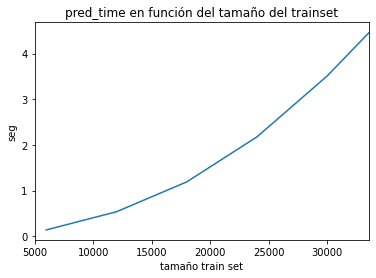

In [24]:
plot_time(knn_pca_grouped, 'pred_time', 5000)

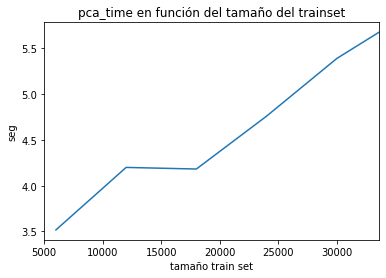

In [25]:
plot_time(knn_pca_grouped, 'pca_time', 5000)

## Comparación

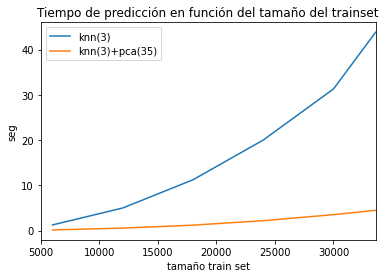

In [36]:
def compare_pred_time():
    xs = knn_pca_grouped.index.values
    
    plt.title("Tiempo de predicción en función del tamaño del trainset")
    plt.xlabel("tamaño train set")
    plt.ylabel("seg")
    

    
    ys = []
    ys_pca = []
    for x in xs:
        ys.append(knn_grouped.loc[x]['predict_time'])
        ys_pca.append(knn_pca_grouped.loc[x]['pred_time'])
    plt.plot(xs, ys, label="knn(3)")
    plt.plot(xs, ys_pca, label="knn(3)+pca(35)")

    plt.xlim(5000, xs[-1])
    plt.legend()
    plt.show()
    
compare_pred_time()

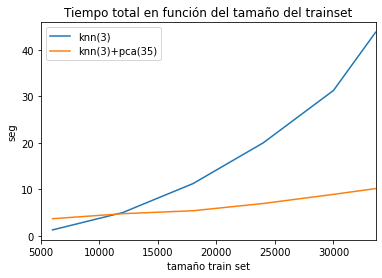

In [37]:
def compare_times():
    xs = knn_pca_grouped.index.values
    
    plt.title("Tiempo total en función del tamaño del trainset")
    plt.xlabel("tamaño train set")
    plt.ylabel("seg")
    

    
    ys = []
    ys_pca = []
    for x in xs:
        ys.append(knn_grouped.loc[x]['predict_time'])
        ys_pca.append(knn_pca_grouped.loc[x]['pred_time']+knn_pca_grouped.loc[x]['pca_time'])
    plt.plot(xs, ys, label="knn(3)")
    plt.plot(xs, ys_pca, label="knn(3)+pca(35)")

    plt.xlim(5000, xs[-1])
    plt.legend()
    plt.show()
    
compare_times()